# Miniproyecto 1  - Actividad 3 (Corregido)

#### <i> Alejandro Tolosa

---
### Transformación e imputación de datos 

Abrir entorno de programación, de preferencia utilizar Visual studio code. Importe las librerías pandas, searborn, matplotlib, numpy y sklearn. Le recomendamos usar un ambiente de conda específico para el curso.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Cargar la base de datos (Gaia NaN.csv o metadato.csv ). Cree una función que permita cargar la base de datos bajo diferentes condiciones. Los argumentos de esta función deben ser: (i) un string con el nombre del directorio donde se encuentre la base de datos, (ii) una variable booleana que indique si se trabajará con una muestra o con la base de datos completa y (iii) un argumento que reciba las columnas con las que se pueda trabajar en una lista. Usted puede agregar nuevos argumentos que den mayor flexibilidad a la carga de datos. Recuerde verificar el tipo de variable reconocido por pandas.

In [2]:
def cargar_datos(directorio, muestra=False, columnas=None):
    try:
        df = pd.read_csv(directorio)
        print(df.dtypes)
        
        if muestra:
            df = df.sample(frac=0.1, random_state=42)
        if columnas:
            df = df[columnas]
        return df
    except FileNotFoundError:
        print(f"Archivo no encontrado: {directorio}")
        return None


df = cargar_datos('metadatos.csv')
if df is not None:
    print("Columnas disponibles en el DataFrame:")
    print(df.columns)


patient_id              object
lesion_id                int64
smoke                   object
drink                   object
background_father       object
background_mother       object
age                      int64
pesticide               object
gender                  object
skin_cancer_history     object
cancer_history          object
has_piped_water         object
has_sewage_system       object
fitspatrick            float64
region                  object
diameter_1             float64
diameter_2             float64
diagnostic              object
itch                    object
grew                    object
hurt                    object
changed                 object
bleed                   object
elevation               object
img_id                  object
biopsed                   bool
dtype: object
Columnas disponibles en el DataFrame:
Index(['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'ski

Genere un diagnóstico de estadística descriptiva y de datos faltantes. Cree una función que permita realizar el diagnóstico de forma flexible, la función debe retornar, media, desviación estándar, valores perdidos por descriptor, valor máximo y valor mínimo. Usted puede usar funciones internas de otras librerías. Cada uno de los estadísticos debe ser un argumento booleano en la función y solo cuando se indique True este se calculará. Los descriptores para los cuales se calcularán estos descriptores también deben ser un argumento de la función.

In [3]:
def diagnostico_datos(df, columnas, media=False, desviacion=False, valores_perdidos=False, maximo=False, minimo=False):
    resultados = {}
    
    if media:
        resultados['media'] = df[columnas].mean()
    if desviacion:
        resultados['desviacion'] = df[columnas].std()
    if valores_perdidos:
        resultados['valores_perdidos'] = df[columnas].isnull().sum()
    if maximo:
        resultados['maximo'] = df[columnas].max()
    if minimo:
        resultados['minimo'] = df[columnas].min()
    
    return resultados


if df is not None:
    columnas_correctas = ['age', 'diameter_1'] 
    resultados_diagnostico = diagnostico_datos(df, columnas_correctas, media=True, valores_perdidos=True)
    print(resultados_diagnostico)


{'media': age           60.464752
diameter_1    11.897055
dtype: float64, 'valores_perdidos': age             0
diameter_1    804
dtype: int64}


Impute los datos perdidos con el método de su elección. Genere una función que reciba una lista de descriptores, el dataframe original y una lista con las estrategias de imputación de cada descriptor. La función debe retornar la nueva base de datos imputada. ¿Cómo cambió la distribución de los datos con la imputación realizada?

In [4]:
def imputar_datos(df, descriptores, estrategias):
    df_imputado = df.copy()
    
    for descriptor, estrategia in zip(descriptores, estrategias):
        if estrategia == 'mean':
            imputer = SimpleImputer(strategy='mean')
        elif estrategia == 'median':
            imputer = SimpleImputer(strategy='median')
        elif estrategia == 'most_frequent':
            imputer = SimpleImputer(strategy='most_frequent')
        elif estrategia == 'constant':
            imputer = SimpleImputer(strategy='constant', fill_value=0)
        
        df_imputado[descriptor] = imputer.fit_transform(df[[descriptor]])
    
    return df_imputado

df_imputado = imputar_datos(df, ['age', 'diameter_1'], ['mean', 'median'])
print(df_imputado.head())


  patient_id  lesion_id  smoke  drink background_father background_mother  \
0   PAT_1516       1765    NaN    NaN               NaN               NaN   
1     PAT_46        881  False  False         POMERANIA         POMERANIA   
2   PAT_1545       1867    NaN    NaN               NaN               NaN   
3   PAT_1989       4061    NaN    NaN               NaN               NaN   
4    PAT_684       1302  False   True         POMERANIA         POMERANIA   

    age pesticide  gender skin_cancer_history  ... diameter_2 diagnostic  \
0   8.0       NaN     NaN                 NaN  ...        NaN        NEV   
1  55.0     False  FEMALE                True  ...        5.0        BCC   
2  77.0       NaN     NaN                 NaN  ...        NaN        ACK   
3  75.0       NaN     NaN                 NaN  ...        NaN        ACK   
4  79.0     False    MALE                True  ...        5.0        BCC   

    itch   grew   hurt  changed  bleed elevation                 img_id  \
0  Fa

In [5]:
print("Datos Originales:")
print(df[['age', 'diameter_1']].describe())

print("Datos Imputados:")
print(df_imputado[['age', 'diameter_1']].describe())

Datos Originales:
               age   diameter_1
count  2298.000000  1494.000000
mean     60.464752    11.897055
std      15.894866     8.634492
min       6.000000     0.000000
25%      52.000000     7.000000
50%      62.000000    10.000000
75%      72.000000    15.000000
max      94.000000   100.000000
Datos Imputados:
               age   diameter_1
count  2298.000000  2298.000000
mean     60.464752    11.233333
std      15.894866     7.019809
min       6.000000     0.000000
25%      52.000000     9.000000
50%      62.000000    10.000000
75%      72.000000    12.000000
max      94.000000   100.000000


<i> Podemos obervar que en la variable "age" no se observan cambios desde ek dataframe original al dataframe con valores imputados, no obstante en la variable "diameter_1" se observa que la media isminuyó de 11.897 a 11.233 después de la imputación, la mediana se mantuvo, pero el cuartil del 25% aumentó de 7 a 9 y el cuartil 75% disminuyó de 15 a 12. Disminuyó la varianza lo que puede implicar que hubo una menor dispersión por lo que podríamos decir que ahora la variable de "diameter_1" se ajusta mejor

Genera 2 gráficos diferentes (ejemplo: boxplot, scatter plot, histogramas, gráfico de torta, etc.) que entreguen información relevante para el modelamiento del problema (ejemplo: correlaciones evidentes, datos atípicos, patrones no lineales de relaciones, etc). Debe explicar tanto la elección de cada gráfico como la información obtenida a partir de ellos.

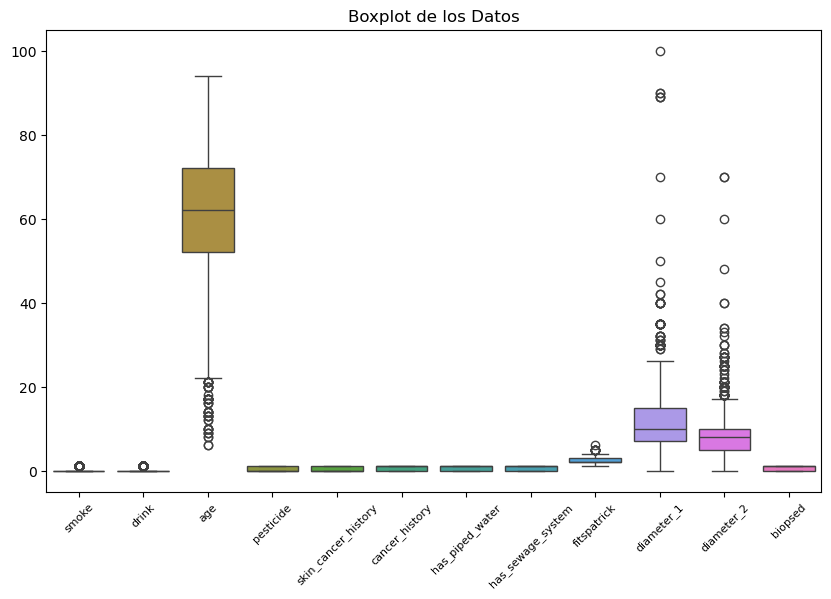

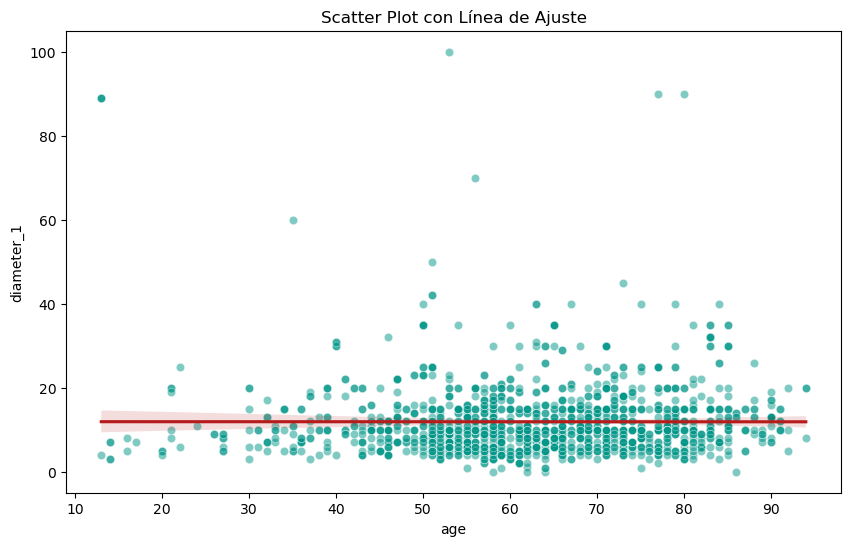

In [6]:
def generar_graficos(df):
    df_sin_lesion_id = df.drop(columns=['lesion_id'])

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_sin_lesion_id)
    plt.title('Boxplot de los Datos')
    
    plt.xticks(rotation=45, fontsize=8)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='age', y='diameter_1', color='#009688', alpha=0.5)
    sns.regplot(data=df, x='age', y='diameter_1', scatter=False, color='#b71c1c') 
    plt.title('Scatter Plot con Línea de Ajuste')
    plt.show

generar_graficos(df)

<i> En el ejercicio anterior se mostró los datos de la estadística descriptiva de "age" y "diameter_1" con respecto a los cambios sufridos despues de la imputación de los valores para esos descriptores. En el primer gráfico de boxplot quitamos la variable "lesion_id" porque se alteraba la escala del boxplot, despues de quitar esa variable. <br> <br>
 Podemos reafirmar la información entregada por el ejercicio anterior con respecto a los cuartiles del 25% y 75% y de la mediana, se puede observar algunos casos atípicos que se presentan en edades tempranas, que de acuerdo al gráfico se puede interpretar que son desde los 5 a los 25 años. Podemos interpretar que la mayoría de los casos de lesiones cutáneas se presentan entre los 52 y 72 años con una mediana de 62 años. Con respecto al díametro 1 de las lesiones cutáneas se encuentran entre los valores 7 y 15 con una mediana de 10, tambien en este descriptor se presentan valores atípicos con diametros superiores a 20 y llegando a un caso de un diametro de valor 100. <br> <br> Por otra parte, hicimos un scatterplot para analizar el comportamiento de la edad versus el diametro y como se comporta la dispersión de esta correlación, con una línea de ajuste en el valor 10, allí podemos evidenciar también los valores atípicos que se presentan en el diametro, como es el caso del paciente que tiene una lesión cuatánea con un diametro de 100.

Cree una función que permita hacer scatter plots y/o box plots para dos descriptores datos. La función debe recibir como argumento las dos variables, y el tipo de gráfico que se desea obtener. La función debe recibir como argumento la decisión de visualizar o guardar los gráficos realizados. Usted puede agregar más argumentos para obtener visualizaciones más personalizadas. Usando dicha función, genere visualizaciones para 5 de los descriptores de la base de datos entregada.

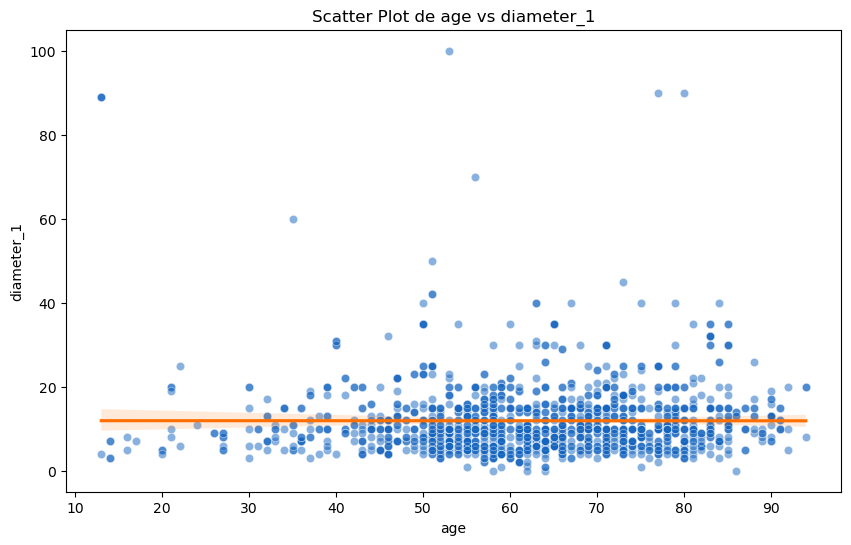

In [7]:
def graficos_personalizados(df, variable1, variable2, tipo='scatter', guardar=False, ruta=None):
    if tipo == 'scatter':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=variable1, y=variable2, color='#1565c0', alpha=0.5)
        sns.regplot(data=df, x=variable1, y=variable2, scatter=False, color='#ff6f00') 
        plt.title(f'Scatter Plot de {variable1} vs {variable2}')
    elif tipo == 'box':
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[[variable1, variable2]])
        plt.title(f'Box Plot de {variable1} y {variable2}')
    
    if guardar and ruta:
        plt.savefig(ruta)
    else:
        plt.show()

graficos_personalizados(df, 'age', 'diameter_1', tipo='scatter', guardar=True, ruta='scatter_plot.png')


Aplique normalización z o escalamiento a los datos. Genere una función que permita aplicar estas transformaciones a los datos, como argumento se debe indicar qué tipo de estrategia se usara para cada descriptor. La función debe retornar el dataframe modificado.

In [8]:
def normalizar_datos(df, descriptores, estrategias):
    df_normalizado = df.copy()
    
    for descriptor, estrategia in zip(descriptores, estrategias):
        if estrategia == 'z_score':
            scaler = StandardScaler()
            df_normalizado[descriptor] = scaler.fit_transform(df[[descriptor]])
    
    return df_normalizado

df_normalizado = normalizar_datos(df, ['age', 'diameter_1'], ['z_score', 'z_score'])
print(df_normalizado.head())


  patient_id  lesion_id  smoke  drink background_father background_mother  \
0   PAT_1516       1765    NaN    NaN               NaN               NaN   
1     PAT_46        881  False  False         POMERANIA         POMERANIA   
2   PAT_1545       1867    NaN    NaN               NaN               NaN   
3   PAT_1989       4061    NaN    NaN               NaN               NaN   
4    PAT_684       1302  False   True         POMERANIA         POMERANIA   

        age pesticide  gender skin_cancer_history  ... diameter_2 diagnostic  \
0 -3.301454       NaN     NaN                 NaN  ...        NaN        NEV   
1 -0.343881     False  FEMALE                True  ...        5.0        BCC   
2  1.040515       NaN     NaN                 NaN  ...        NaN        ACK   
3  0.914661       NaN     NaN                 NaN  ...        NaN        ACK   
4  1.166369     False    MALE                True  ...        5.0        BCC   

    itch   grew   hurt  changed  bleed elevation        

Genere sets de entrenamiento y testeo, con separación estratificada. Genere una función que aplique este procesamiento. No olvide fijar la semilla aleatoria para poder replicar los resultados.

In [9]:
def generar_sets(df, objetivo, test_size=0.2, stratify=True):
    if stratify:
        stratify_col = df[objetivo]
    else:
        stratify_col = None
    
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=[objetivo]), df[objetivo], test_size=test_size, random_state=42, stratify=stratify_col
    )
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = generar_sets(df, 'diagnostic')


Consolide todas las funciones en una clase. Esta clase tendrá por nombre preprocesamiento. Algunos de los parámetros que se usan en las funciones antes creadas pueden ser entregadas en la inicialización de la clase. Agregue una función que aplique todo el procesamiento, denomine a esta función ejecutar procesamiento.

In [10]:
class Preprocesamiento:
    def __init__(self, directorio, columnas=None, muestra=False):
        self.df = cargar_datos(directorio, muestra, columnas)
    
    def diagnostico(self, columnas, media=False, desviacion=False, valores_perdidos=False, maximo=False, minimo=False):
        return diagnostico_datos(self.df, columnas, media, desviacion, valores_perdidos, maximo, minimo)
    
    def imputar(self, descriptores, estrategias):
        self.df = imputar_datos(self.df, descriptores, estrategias)
    
    def graficos(self):
        generar_graficos(self.df)
    
    def graficos_personalizados(self, variable1, variable2, tipo='scatter', guardar=False, ruta=None):
        graficos_personalizados(self.df, variable1, variable2, tipo, guardar, ruta)
    
    def normalizar(self, descriptores, estrategias):
        self.df = normalizar_datos(self.df, descriptores, estrategias)
    
    def generar_sets(self, objetivo, test_size=0.2, stratify=True):
        return generar_sets(self.df, objetivo, test_size, stratify)
    
    def ejecutar_procesamiento(self, descriptores_imputacion, estrategias_imputacion, descriptores_normalizacion, estrategias_normalizacion, objetivo, test_size=0.2, stratify=True):
        self.imputar(descriptores_imputacion, estrategias_imputacion)
        self.normalizar(descriptores_normalizacion, estrategias_normalizacion)
        return self.generar_sets(objetivo, test_size, stratify)



procesamiento = Preprocesamiento('metadatos.csv', muestra=True)
columnas_correctas = ['age', 'diameter_1']  # Actualiza con los nombres reales
resultados_diagnostico = procesamiento.diagnostico(columnas_correctas, media=True, valores_perdidos=True)
print(resultados_diagnostico)
procesamiento.imputar(['age'], ['mean'])  # Actualiza con los nombres reales
X_train, X_test, y_train, y_test = procesamiento.ejecutar_procesamiento(['age'], ['mean'], ['age'], ['z_score'], 'diagnostic')  # Actualiza con los nombres reales



patient_id              object
lesion_id                int64
smoke                   object
drink                   object
background_father       object
background_mother       object
age                      int64
pesticide               object
gender                  object
skin_cancer_history     object
cancer_history          object
has_piped_water         object
has_sewage_system       object
fitspatrick            float64
region                  object
diameter_1             float64
diameter_2             float64
diagnostic              object
itch                    object
grew                    object
hurt                    object
changed                 object
bleed                   object
elevation               object
img_id                  object
biopsed                   bool
dtype: object
{'media': age           60.66087
diameter_1    11.68125
dtype: float64, 'valores_perdidos': age            0
diameter_1    70
dtype: int64}


---
### Entrenamiento de modelos 

Ajuste los clasificadores naive Bayes (desde sklearn.naive bayes.GaussianNB) y regresión logística (desde sklearn.linear model.LogisticRegression ). Genere una función con nombre clasificador que reciba como argumento: (i) el tipo de clasificador que desea ajustar, (ii) el nombre de la dirección donde se guardara el modelo y (iii) los datos de entrenamiento. La función solo debe ajustar y guardar el modelo.

Cree una función que tenga por nombre evaluar rendimiento, esta función debe recibir la dirección del modelo, los datos que desea evaluar (entrenamiento o test) y el tipo de análisis. Los análisis posibles son: (i) mostrar la matriz de confusión y (ii) mostrar las métricas de evaluación (accuracy, recall, precision y F1-score).

Use estas funciones para probar distintos modelos, explore los siguientes argumentos en la regresión logística: penalty, C, class weight, l1 ratio. En naive Bayes modifique: priors de acuerdo a la descripción de la librería. Entregue un análisis de los resultados y seleccione un modelo. También puede aplicar procedimientos para seleccionar los descriptores que se incluyen en el modelo final.

Columnas disponibles en el DataFrame:
Index(['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed'],
      dtype='object')
Modelo guardado en clf1.pkl


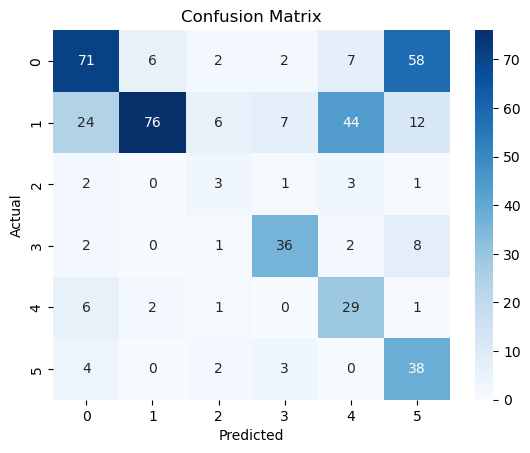

Accuracy: 0.55
Recall: 0.55
Precision: 0.6835807715418146
F1 Score: 0.5676651694665527
Modelo guardado en logr1.pkl


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


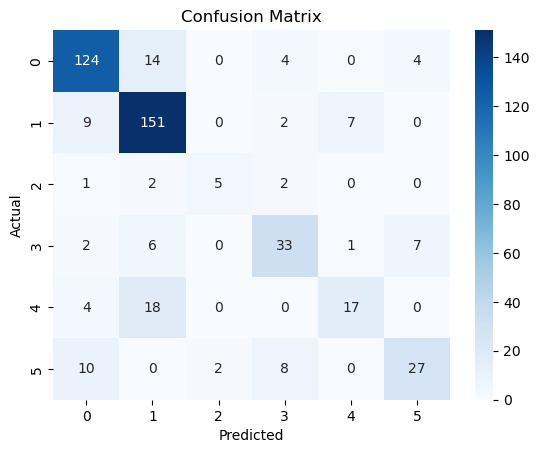

Accuracy: 0.7760869565217391
Recall: 0.7760869565217391
Precision: 0.7703440373070166
F1 Score: 0.768601028298119
Modelo guardado en logr2.pkl


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


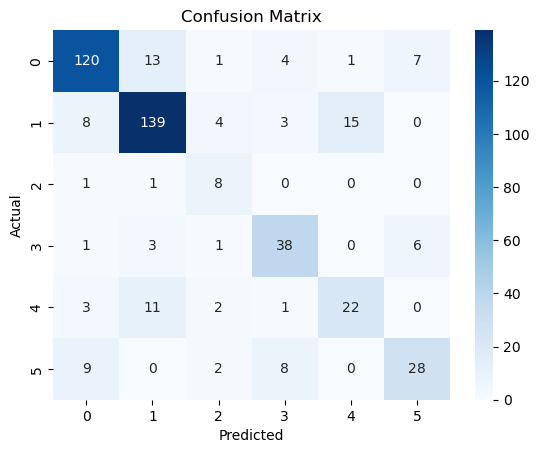

Accuracy: 0.7717391304347826
Recall: 0.7717391304347826
Precision: 0.7774943187364788
F1 Score: 0.7729532137694864
Modelo guardado en logr3.pkl


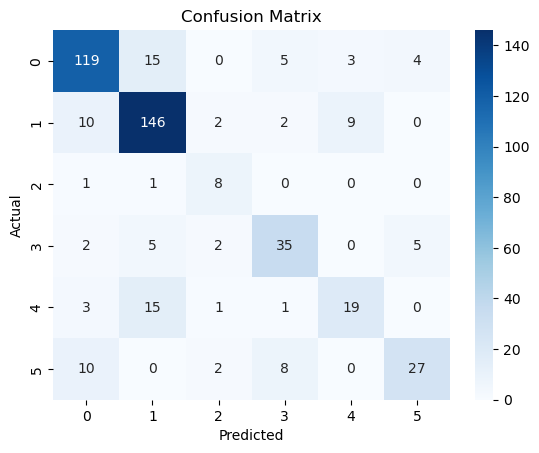

Accuracy: 0.7695652173913043
Recall: 0.7695652173913043
Precision: 0.768491583362561
F1 Score: 0.7661984111411674
Modelo guardado en logr4.pkl


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


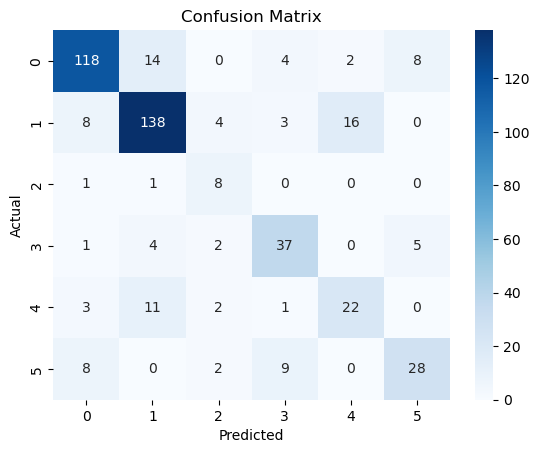

Accuracy: 0.7630434782608696
Recall: 0.7630434782608696
Precision: 0.7702825089320051
F1 Score: 0.7649054788453491


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('metadatos.csv')

print("Columnas disponibles en el DataFrame:")
print(df.columns)

if 'diagnostic' in df.columns:
    label_encoder = LabelEncoder()
    df['diagnostic'] = label_encoder.fit_transform(df['diagnostic'])
    
    df = pd.get_dummies(df, columns=df.columns.difference(['diagnostic']))

    def generar_sets(df, objetivo, test_size=0.2, stratify=True):
        if stratify:
            stratify_col = df[objetivo]
        else:
            stratify_col = None
        
        X_train, X_test, y_train, y_test = train_test_split(
            df.drop(columns=[objetivo]), df[objetivo], test_size=test_size, random_state=42, stratify=stratify_col
        )
        
        return X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = generar_sets(df, 'diagnostic')

    def clasificador(modelo, ruta, X_train, y_train):
        modelo.fit(X_train, y_train)
        joblib.dump(modelo, ruta)
        print(f"Modelo guardado en {ruta}")

    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    def evaluar_rendimiento(ruta_modelo, X, y, tipo='metrics'):
        modelo = joblib.load(ruta_modelo)
        y_pred = modelo.predict(X)
        
        if tipo == 'metrics':
            accuracy = accuracy_score(y, y_pred)
            recall = recall_score(y, y_pred, average='weighted')
            precision = precision_score(y, y_pred, average='weighted')
            f1 = f1_score(y, y_pred, average='weighted')
            print(f"Accuracy: {accuracy}")
            print(f"Recall: {recall}")
            print(f"Precision: {precision}")
            print(f"F1 Score: {f1}")
        elif tipo == 'confusion_matrix':
            cm = confusion_matrix(y, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix')
            plt.show()
        else:
            raise ValueError("Tipo de análisis no reconocido. Use 'metrics' o 'confusion_matrix'.")


    # NAIVE BAYES
    clf1 = GaussianNB()
    clasificador(clf1, "clf1.pkl", X_train, y_train)
    evaluar_rendimiento("clf1.pkl", X_test, y_test, tipo="confusion_matrix")
    evaluar_rendimiento("clf1.pkl", X_test, y_test, tipo="metrics")

    # REG LOGÍSTICA
    logr1 = LogisticRegression()
    clasificador(logr1, "logr1.pkl", X_train, y_train)
    evaluar_rendimiento("logr1.pkl", X_test, y_test, tipo="confusion_matrix")
    evaluar_rendimiento("logr1.pkl", X_test, y_test, tipo="metrics")

    logr2 = LogisticRegression(penalty='l2', C=2.0, class_weight='balanced')
    clasificador(logr2, "logr2.pkl", X_train, y_train)
    evaluar_rendimiento("logr2.pkl", X_test, y_test, tipo="confusion_matrix")
    evaluar_rendimiento("logr2.pkl", X_test, y_test, tipo="metrics")

    logr3 = LogisticRegression(penalty='l1', C=2.0, class_weight='balanced', solver='liblinear')
    clasificador(logr3, "logr3.pkl", X_train, y_train)
    evaluar_rendimiento("logr3.pkl", X_test, y_test, tipo="confusion_matrix")
    evaluar_rendimiento("logr3.pkl", X_test, y_test, tipo="metrics")

    logr4 = LogisticRegression(penalty='elasticnet', l1_ratio=0.3, C=2.0, class_weight='balanced', solver='saga')
    clasificador(logr4, "logr4.pkl", X_train, y_train)
    evaluar_rendimiento("logr4.pkl", X_test, y_test, tipo="confusion_matrix")
    evaluar_rendimiento("logr4.pkl", X_test, y_test, tipo="metrics")
else:
    print("La columna 'diagnostic' no se encuentra en el DataFrame.")
